# O Scikit-Learn
- Ferramentas simples e eficientes para análise preditiva de dados
- Acessível a todos e reutilizável em vários contextos
- Construído em NumPy, SciPy e Matplotlib
- Disponível em: https://scikit-learn.org/

### Utilizando o Scikit-Learn nos dados vistos no módulo "Utilizando o Aprendizado de Máquinas"
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [36]:
# Importando o pandas
import pandas as pd

In [37]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

In [38]:
# Transformando em um dataframe e usando somente target 0 e 1
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
# iris = iris[iris.target != 2]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
# verificando os valores da base
iris.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [40]:
X = iris[['petal length (cm)','petal width (cm)']]
y = iris.target

### Separando os dados em Treino e Teste
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
    


In [41]:
# Importando O train_test_split
from sklearn.model_selection import train_test_split

In [42]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Vamos utilizar o Perceptron para separar esses dados
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

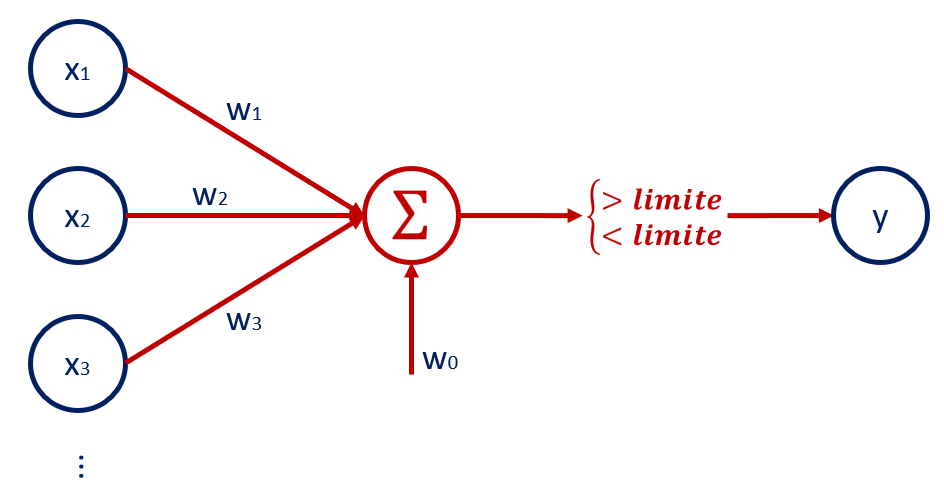

In [43]:
# Importação do perceptron
from sklearn.linear_model import Perceptron

In [44]:
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [45]:
clf_percep = Perceptron()

In [46]:
# Fazendo o fit do modelo
clf_percep.fit(X_train, y_train)

Perceptron()

In [47]:
# Avaliando o modelo para a base já separada
clf_percep.score(X_train, y_train)

0.6476190476190476

**Criando um gráfico com esses dados**

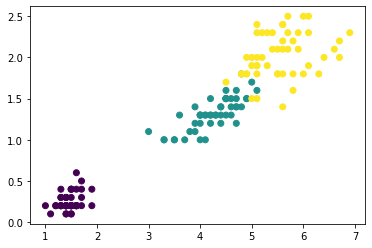

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c=iris.target)

plt.show()

**Exibindo a reta gerada pelo Perceptron**

In [49]:
# w1 e w2
clf_percep.coef_

array([[ -1.5,  -1.2],
       [  5.3, -17.6],
       [  0.1,  27.4]])

In [50]:
# w0
clf_percep.intercept_

array([  4., -12., -44.])

**Entendendo a reta gerada pelo perceptron**<br>
w1.x + w2.y + w0 = 0<br>
w2.y = - w1.x - w0<br>
y = (- w1.x - w0)/w2

In [51]:
# Criando a reta
import numpy as np

w1 = clf_percep.coef_[0][0]
w2 = clf_percep.coef_[0][1]
w0 = clf_percep.intercept_[0]

x = np.arange(0,5)
y = (-w1*x-w0)/w2

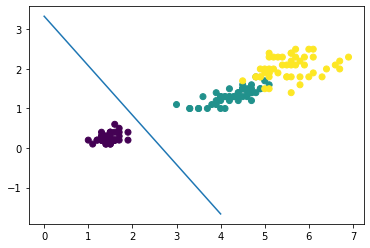

In [52]:
# Visualizando de forma gráfica
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c=iris.target)
ax.plot(x,y)

plt.show()

### Agora vamos utilizar a árvore de decisão para tratar esses dados
- https://scikit-learn.org/stable/modules/tree.html

In [53]:
from sklearn import tree

In [54]:
clf_arvore = tree.DecisionTreeClassifier()

In [55]:
clf_arvore = clf_arvore.fit(X_train, y_train)

In [56]:
clf_arvore.score(X_train, y_train)

0.9904761904761905

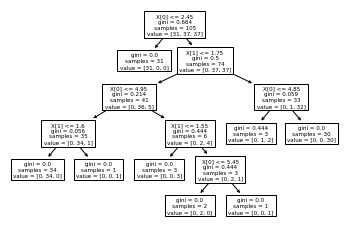

In [57]:
tree.plot_tree(clf_arvore);

In [58]:
# X -> condição se x menor ou igual a 2.45
# (Indice) gini -> O quanto esses dados estão desiguais nesse caso 50%
# Sample -> número de dados -> tamanho da amostra
# Value -> 50% dos dados estão assumindo o primeiro valor que é 0, 50% dos dados estão assumindo o segundo valor que é 1

In [59]:
iris[iris['petal length (cm)'] <= 2.45].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
# Pegando apenas a coluna target
iris.loc[iris['petal length (cm)'] <= 2.45, 'target'].value_counts()

0    50
Name: target, dtype: int64

## Avaliando esses dois modelos

In [61]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

#### Até esse momento ainda não fizemos o valor Predido pelo modelo. Vamos fazer agora!

In [62]:
predictArvore = clf_arvore.predict(X_test)
predictPercep = clf_percep.predict(X_test)

In [63]:
# Perceptron
confusion_matrix(y_test, predictPercep)

array([[19,  0,  0],
       [ 7,  0,  6],
       [ 0,  0, 13]], dtype=int64)

In [64]:
# Árvore de decisão
confusion_matrix(y_test, predictArvore)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

***Acurácia - Vai medir exatamente os valores que foram classificados de forma correta***

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
# Acurácia do Perceptron
accuracy_score(y_test, predictPercep)

0.7111111111111111

In [67]:
# Acurácia da árvore
accuracy_score(y_test, predictArvore)

1.0

***Precisão - A precisão é intuitivamente a capacidade do classificador***

In [68]:
from sklearn.metrics import precision_score

In [69]:
# Precisão do Perceptron
precision_score(y_test, predictPercep, average='micro')

0.7111111111111111

In [70]:
# Precisão da árvore
precision_score(y_test, predictArvore, average='micro')

1.0

***Recall - É intuitivamente a capacidade do classificador de encontrar todas as amostras positivas.***

In [71]:
from sklearn.metrics import recall_score

In [72]:
# Recall do Perceptron
recall_score(y_test, predictPercep, average='micro')

0.7111111111111111

In [73]:
# Recall da árvore
recall_score(y_test, predictArvore, average='micro')

1.0